In [1]:
from pcapreader import PcapReader
import numpy as np 
import struct
import matplotlib.pyplot as plt
import packet_organizer as po

In [2]:
path = "D:\syndicate_tests_velocity_detection_1\FMCW_Radar\FMCW_Radar.raw"
orgi = po.Organizer(path, 
            radar_config= {"chirps"  : 128,
                           "tx"      : 3,
                           "rx"      : 4,
                           "samples" : 256}
            ) 

organized_data = orgi.organize()

Count: 10812
True Packet Count: 10803


In [3]:
print(organized_data.shape)

(9, 384, 4, 256)


In [4]:
range_bins = np.fft.fft(organized_data, axis=3)
range_doppler = np.fft.fft(range_bins, axis=1)

range_doppler = np.fft.fftshift(range_doppler, axes=0)

THETA_BIN_COUNT = 128
padding = ((0,0), (0,0), (0,THETA_BIN_COUNT-range_bins.shape[2]), (0,0))
theta_bins=np.fft.fft( np.pad(range_doppler, padding), axis=2)



padding = ((0,0), (0,0), (0,THETA_BIN_COUNT-range_bins.shape[2]), (0,0))

In [5]:
#find angle units
#May be wrong?
omega = np.fft.fftfreq(theta_bins.shape[1])*2
angle_bin_vals = np.arcsin(omega)

In [6]:
#find range units
bandwidth = 3600.72e6
range_res = 3e8 / (2 * bandwidth)
range_bin_vals = np.arange(organized_data.shape[3])*range_res

In [16]:
# find velocity resolution
c = 3e8 # Speed of light (m/s)
sample_rate = 5000 # Rate at which the radar samples from ADC (ksps - kilosamples per second)
freq_slope = 60.012 # Frequency slope of the chirp (MHz/us)
adc_samples = 256 # Number of samples from a single chirp

start_freq = 77. # Starting frequency of the chirp (GHz)
idle_time = 100 # Time before starting next chirp (us)
ramp_end_time = 60 # Time after sending each chirp (us)
num_chirps = 128 # Number of chirps per frame
num_tx = 3 # Number of transmitters

velocity_res = c / (2 * start_freq * 1e9 * (idle_time + ramp_end_time) * 1e-6 * num_chirps * num_tx)
velocities = np.arange(num_chirps) - (num_chirps // 2)
velocities = velocities * velocity_res


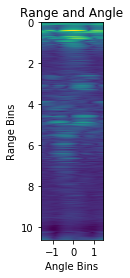

In [14]:
#show angle and range
plt.imshow(np.log(np.fft.fftshift(np.abs(theta_bins), axes=2)[8].sum(0).T), extent=[angle_bin_vals.min(), angle_bin_vals.max(), range_bin_vals.max(), range_bin_vals.min()])
plt.xlabel('Angle (Rad)')
plt.ylabel('Range (meters)')
plt.title('Range and Angle')
plt.show()

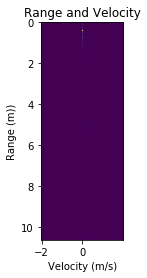

In [18]:
#Show Range and Velocity
plt.imshow((np.fft.fftshift(np.abs(range_doppler[8,::,::,::].sum(1)), axes=0).T), extent=[velocities.min(), velocities.max(), range_bin_vals.max(), range_bin_vals.min()])
plt.xlabel('Velocity (m/s)')
plt.ylabel('Range (m)')
plt.title('Range and Velocity')
plt.show()

c:\Users\111\.conda\envs\mm\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
c:\Users\111\.conda\envs\mm\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


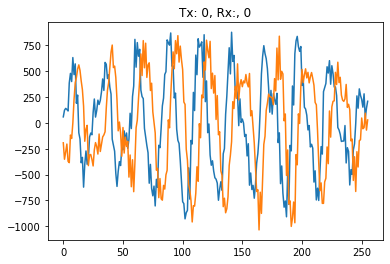

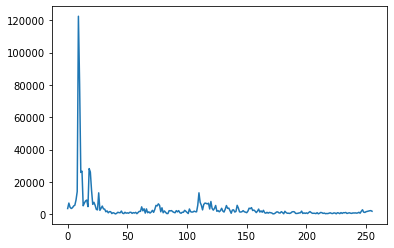

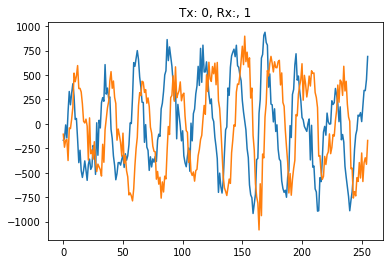

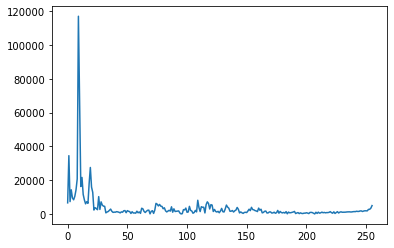

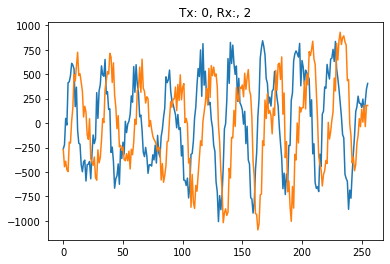

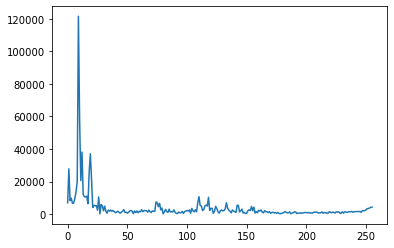

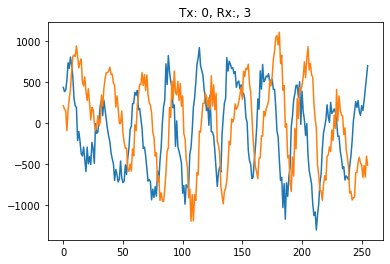

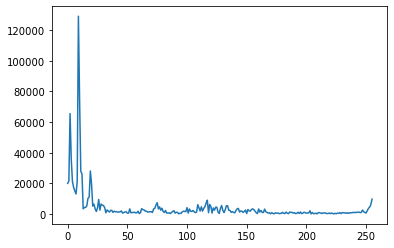

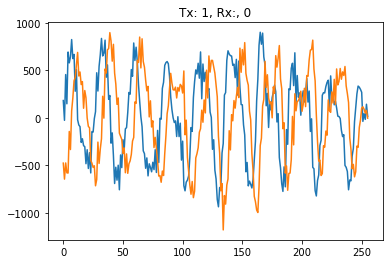

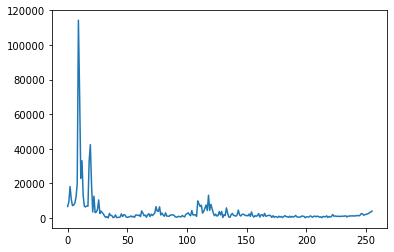

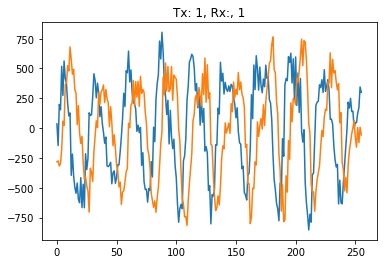

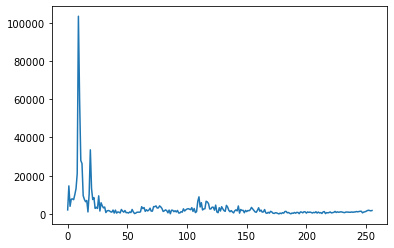

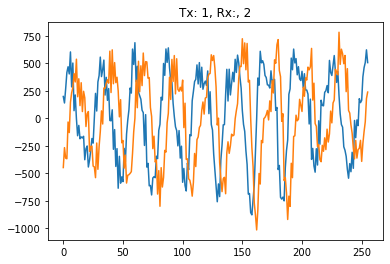

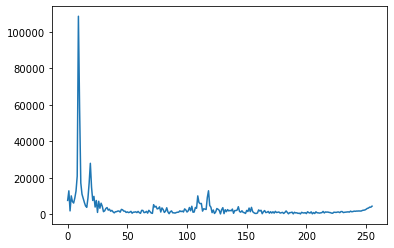

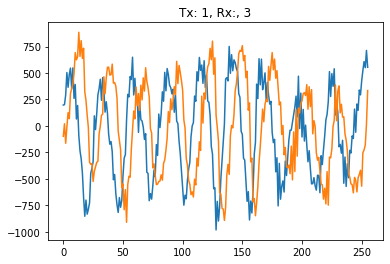

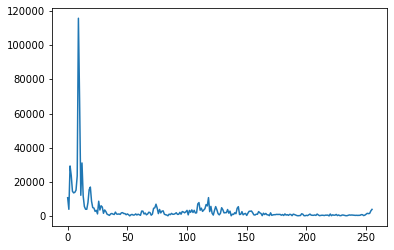

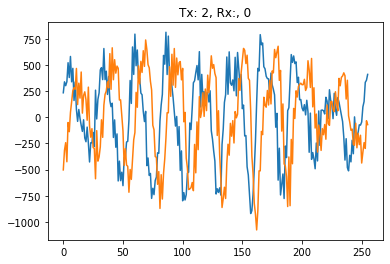

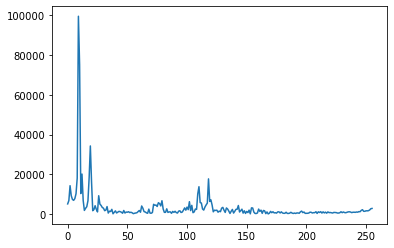

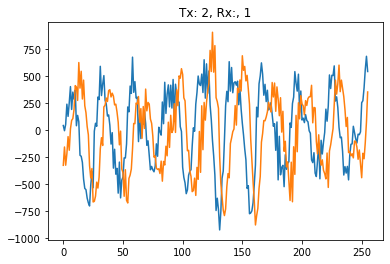

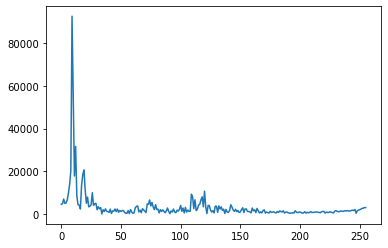

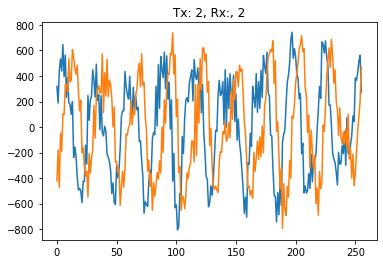

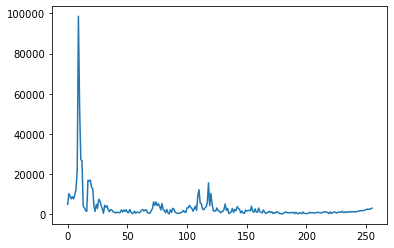

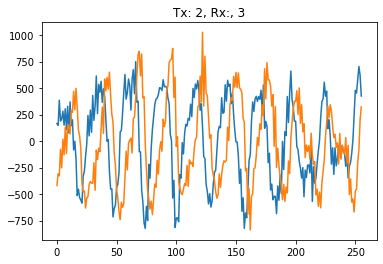

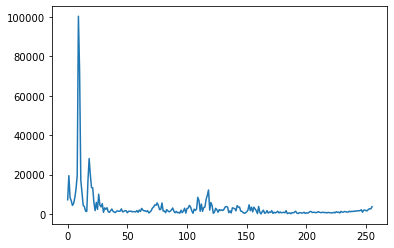

In [6]:
id = 5
for j in range(3):
    for i in range(4):
        plt.figure()
        plt.title(f"Tx: {j}, Rx:, {i}")
        a = organized_data[id,j,i,::]
        plt.plot(np.real(a))
        plt.plot(np.imag(a))
        plt.figure()
        # plt.xlim(xmax=40)
        plt.plot(np.abs(np.fft.fft(a)))